## Importa as Bibliotecas e a Base de Dados

In [8]:
# Chama as bibliotecas
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as ptl

# Carrega a base de dados
data = pd.read_csv("CTG.csv")

# Eliminando colunas que não serão utilizadas
data = data.drop(data.columns[0], axis=1)

data.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,2
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,1
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,1
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,1
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,1


## Cria o dataframe

In [9]:
df_data = pd.DataFrame(data)
df_data = df_data.drop(columns=["NSP"])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

## Cria o Dataset de Treino

In [10]:
from sklearn.model_selection import train_test_split

# Separa os dados em treino, teste e validação
x_train, x_temp, y_train, y_temp = train_test_split(df_data, data["NSP"], test_size=0.5, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

## Regra do Cotovelo Para Achar o Melhor K

In [11]:
from sklearn.neighbors import KNeighborsClassifier

error_tx = []
x_validation = np.ascontiguousarray(x_validation)

for i in range(1, 100):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    pred = KNN.predict(x_validation)
    error_tx.append(np.mean(pred!=y_validation))


/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifi

## Printa o Grafico de Erro dos K's

Text(0, 0.5, 'Erro')

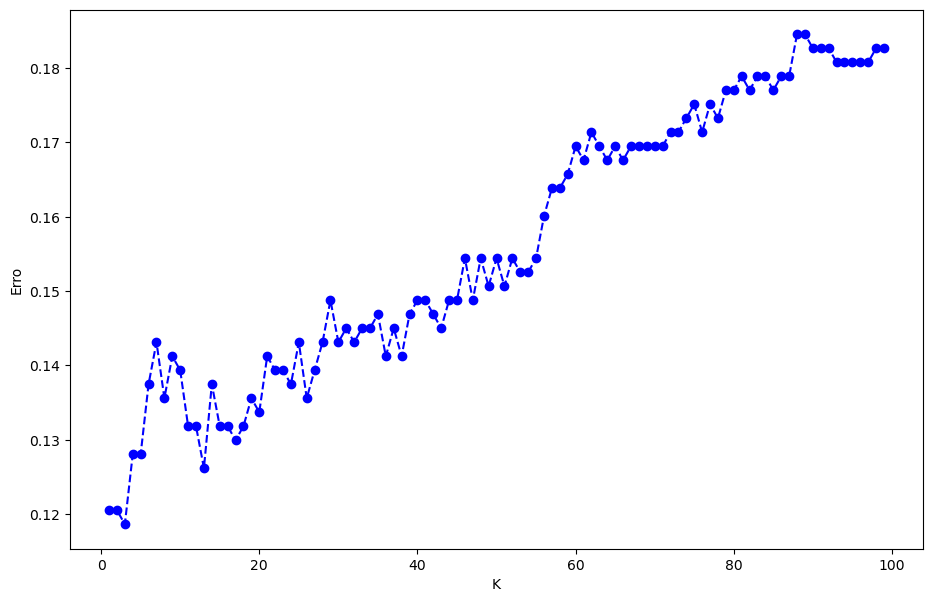

In [12]:
ptl.figure (figsize=(11,7))
ptl.plot(range(1,100),error_tx,color='blue',linestyle='dashed',marker='o')
ptl.xlabel('K')
ptl.ylabel('Erro')

# Tenta encontrar o melhor modelo

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

higher = -1
for i in ("distance", "uniform"):
    for j in range(1, 100):
        KNN = KNeighborsClassifier(n_neighbors=j, weights=i)
        KNN.fit(x_train, y_train)
        pred = KNN.predict(x_validation)
        if accuracy_score(y_validation, pred) > higher:
            higher = accuracy_score(y_validation, pred)
            best_k = j
            best_w = i

print("\nMelhor configuração para o KNN")
print("K: ",best_k," Métrica: ", best_w," Acc: ", higher)

/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifi


Melhor configuração para o KNN
K:  3  Métrica:  distance  Acc:  0.8870056497175142


/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifi

## Executa o Melhor Modelo

In [14]:
from sklearn.metrics import classification_report

KNN_model = KNeighborsClassifier(n_neighbors=3, weights="distance")
KNN_model.fit(x_train, y_train)
opinion = KNN_model.predict(x_validation)
print("Acc: ", accuracy_score(y_validation, opinion))
print("Relatório de Classificação:\n", classification_report(y_validation, pred))
confusion_matrix(y_validation, opinion)

Acc:  0.8870056497175142
Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.84      0.97      0.90       418
           2       0.59      0.41      0.48        74
           3       0.00      0.00      0.00        39

    accuracy                           0.82       531
   macro avg       0.48      0.46      0.46       531
weighted avg       0.74      0.82      0.78       531



/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mclovin/Cardiotocography/Python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: Unde

array([[399,  16,   3],
       [ 27,  43,   4],
       [  6,   4,  29]])